<div style="display: flex; background-color: RGB(255,204,50);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analyses de données.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Je vous propose d'utiliser les librairies:
- pandas: pour le chargement des fichiers
 
- plotly express pour la réalisation des graphiques:<br>
    - plus simple d'utilisation que matplolib, ce qui signifie un apprentissage plus rapide<br>
    - des graphiques à l'esthetique très agréables<br>
    - interactif<br>
    - graphique sauvegardable en image de manière très simple<br>

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...

<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 Importation des librairies</h2>
</div>

In [19]:
from pathlib import Path

import pandas as pd
import plotly.express as px

# instruction permettant d'afficher, par défaut, toutes les colonnes d'un dataframe
pd.set_option("display.max_columns", None)

Dans les résultats de recherche dans Google, privilégiez les solutions provenants de Stack Overflow ou Medium

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Settings</h2>
</div>

Organisation du répertoire de travail:

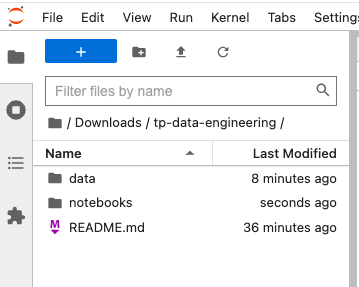

Le notebook exemple, nommé `notebook-exemple-bottleneck.ipynb` est enregistré dans `notebooks/`

Avec cet exemple de structure, le répertoire parent est: `tp-data-engineering`.Vous pouvez exécuter le code suivant est analysé les résultats

In [11]:
# définir le répertoire du projet contenant le dossier data/ et notebooks/
HOME_DIR = Path.cwd().parent
print(f"Home directory: {HOME_DIR}")

# définir le répertoire des données
DATA_DIR = Path(HOME_DIR, "data", "optimisez-gestion")
print(f"Data directory: {DATA_DIR}")


Home directory: /Users/mouslydiaw/Downloads/tp-data-engineering
Data directory: /Users/mouslydiaw/Downloads/tp-data-engineering/data/optimisez-gestion


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.3 - Chargements des fichiers</h2>
</div>


Voici le descriptif des trois fichiers à charger : 


- `erp.xlsx`: l’extraction de l’ERP contient la référence produit, le prix et l’état du stock. ERP, Entreprise Resource Planning, est unlogiciel conçu pour gérer et automatiser les processus commerciaux et opérationnels au sein d'une entreprise). 
- `web.xlsx`: L’extraction de notre site Web (SKU, quantités vendues, description des produits, etc.)
- `liaison.xlsx`: Une table de liaison qui permet de lier les références entre la base de données Wordpress et l’extraction de l’ERP de l’entreprise. 


In [17]:
# Importation du fichier web.xlsx
df_web = pd.read_excel(Path(DATA_DIR, "web.xlsx")) # Path(DATA_DIR, "web.xlsx"): chemin vers le fichier web.xlsx

# Importation du fichier erp.xlsx, nommé la variable df_erp

# importation du fichier liaison.xlsx, nommé la variable df_liaison


/Users/mouslydiaw/opt/anaconda3/envs/python39/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/Users/mouslydiaw/opt/anaconda3/envs/python39/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [15]:
# dimension du DataFrame: (#lignes, #colonnes)
df_web.shape

(1513, 29)

In [20]:
# Retourne les `n` premières lignes (par défaut, 5).
df_web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,post_date_gmt,post_content,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,NaN,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,NaN,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,16057,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-04-17 15:29:17,2018-04-17 13:29:17,NaN,Vin,Domaine Pellé Sancerre Rouge La Croix Au Garde...,NaN,publish,closed,closed,NaN,pelle-sancerre-rouge-la-croix-au-garde-2017,2020-07-07 10:05:02,2020-07-07 08:05:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
2,14692,0,0,0,0.0,5.0,taxable,NaN,2.0,2019-03-19 10:06:47,2019-03-19 09:06:47,NaN,Vin,Château Fonréaud Bordeaux Blanc Le Cygne 2016,<div>Grâce à la complémentarité des 3 cépages ...,publish,closed,closed,NaN,fonreaud-bordeaux-blanc-le-cygne-2016,2020-04-25 21:40:31,2020-04-25 19:40:31,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16295,0,0,0,0.0,14.0,NaN,NaN,2.0,2018-02-15 14:05:06,2018-02-15 13:05:06,NaN,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...,NaN,publish,closed,closed,NaN,moulin-de-gassac-igp-pays-dherault-guilhem-ros...,2020-08-27 18:55:03,2020-08-27 16:55:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
4,15328,0,0,0,0.0,2.0,taxable,NaN,2.0,2019-03-27 18:05:09,2019-03-27 17:05:09,NaN,Vin,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",publish,closed,closed,NaN,agnes-levet-cote-rotie-maestria-2017,2020-07-25 15:45:02,2020-07-25 13:45:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier erp.xlsx</h2>
</div>

Pour découvrir ou connaitre les détails des méthodes proposées par pandas, vous pouvez vous référer à sa documentation sur les dataframes: https://pandas.pydata.org/docs/reference/frame.html

In [18]:
# Afficher les dimensions du dataset
print(f"Le tableau comporte {len(df_erp)} observation(s) ou article(s)")
print(f"Le tableau comporte {df_erp.shape[1]} colonne(s)")

# vous pouvez le faire avec:
df_erp.shape

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [26]:
# Consulter la nature des données dans chacune des colonnes
# Le nombre de valeurs présentes dans chacune des colonnes

df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 38.8+ KB


In [ ]:
# Afficher les 5 premières lignes de la table


In [ ]:
# Vérifier s'il y a des lignes en doublons dans la colonne product_id

#Vérifier si il y a les lignes en doublons dans la colonne product_id
print("1er méthode - Absence de doublons dans la table: {}"
      .format(df_erp["product_id"].drop_duplicates().size == df_erp.shape[0]))

# autre méthode
print(f"2e méthode - Nombre de doublons dans la table: {df_erp.duplicated('product_id', keep=False).sum()}")

In [ ]:
# Afficher les valeurs distinctes de la colonne stock_status
# À quelle(s) autre(s) colonne(s) sont-elles liées ?


In [ ]:
# Création d'une colonne "stock_status_2
# La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
# si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"


In [ ]:
# Vérifions que les 2 colonnes sont identiques:
# Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
# La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

# Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
# C'est un bon début, mais difficile à exploiter

In [ ]:
# Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
# True vaut 1 et False 0
# Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset

In [ ]:
# Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
# Dans ce cas je vous mets ce lien pour apprendre à réaliser des filtres dans Pandas:
# https://bitbucket.org/hrojas/learn-pandas/src/master/
# Lesson 3

In [ ]:
# Corriger la ou les données incohérentes

# Verification en utilisant le même code que plus haut pour afficher les problemes

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
###############
## LES PRIX  ##
###############

# Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
# Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format()) # Saisir l'instruction manquante dans la fonction format
# Afficher le prix minimum de la colonne "price"

# Afficher le prix maximum de la colonne "price"

# Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"

#Afficher la quantité maximum de la colonne "stock_quantity"

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
# Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?


In [ ]:
# Quelles sont les colonnes à conserver selon vous?


In [ ]:
# Supprimer la colonnecomportant le libellé "stock_status_2" car elle est redondante 
# avec la colonne "stock_status".


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [ ]:
######################
##   prix d'achat   ##
######################

# Vérification de la colonne purchase_price : 
# Afficher le ou les prix non renseignés dans la colonne "purchase_price"

# Afficher le prix minimum de la colonne "purchase_price"

# Afficher le prix maximum de la colonne "purchase_price"


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h2>
</div>
 

In [ ]:
# Dimension du dataset
# Nombre d'observations

# Nombre de caractéristiques


In [ ]:
# Consulter le nombre de colonnes
# La nature des données dans chacune des colonnes
# Le nombre de valeurs présentes dans chacune des colonnes


In [ ]:
# Selon vous, quelles sont les colonnes à conserver ?


In [ ]:
# Si vous avez défini des colonnes à supprimer, effectuer l'opération


In [ ]:
# Visualisation des valeurs de la colonne sku
# Quelles sont les valeurs qui ne semblent pas respecter la régle de codification ?


In [ ]:
# Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?


In [ ]:
# Identifier les lignes sans code articles


In [ ]:
# Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre


In [ ]:
# La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?


In [ ]:
# Les lignes sans code article semble être toutes non renseignés
# Pour s'en assurer réaliser les étapes suivantes:
# 1 - Créer un dataframe avec uniquement les lignes sans code article

# 2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes

# 3 - Que constatez-vous?

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h2>
</div>

In [ ]:
# Dimension du dataset
# Nombre d'observations

# Nombre de caractéristiques


In [ ]:
# Consulter le nombre de colonnes
# La nature des données dans chacune des colonnes
# Le nombre de valeurs présentes dans chacune des colonnes


In [ ]:
# Les valeurs de la colonne "product_id" sont elles toutes uniques?


In [ ]:
# Les valeurs de la colonne "id_web" sont-elles toutes uniques?


In [ ]:
# Avons-nous des articles sans correspondances?


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jointure des fichiers</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h2>
</div>

In [ ]:
# Fusion des fichiers df_erp et df_liaison


In [ ]:
# Y a t-il des lignes ne "matchant" entre les 2 fichiers?


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h2>
</div>

In [ ]:
# Fusionnez les datasets df_merge et df_web


In [ ]:
# Avons-nous des lignes sans correspondances?


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h2>
</div>

In [ ]:
# Création d'une Boite à moustache de la répartition des prix grâce à Pandas


In [ ]:
# Autre méthode avec plotly express


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utilisation de méthodes statistiques</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
# Calculer la moyenne du prix

# Calculer l'écart-type du prix

# Calculer le Z-score


In [ ]:
# Quel est le seuil prix dont z-score est supérieur à 3?


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
# Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions


In [ ]:
# Définissez un seuil pour les articles "outliers" en prix


In [ ]:
# Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"


In [ ]:
# Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible ?


<div style="background-color: RGB(51,165,182);" >
<h1 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h1>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h2>
</div>

In [ ]:
##############################
# Calculer le CA su site web #
##############################

# Créez une colonne calculant le CA par article

# Calculez la somme de la colonne "ca_par_article"
# Ce résultat correspond au chiffre d'affaire du site web


In [ ]:
###############################
# Palmares des articles en CA #
###############################

# Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge

# Réinitialiser l'index du dataset par un reset_index

# Afficher les 20 premier articles en CA

# Graphique en barre des 20 premiers articles avec plotly express


In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# Créer une colonne calculant la part du CA de la ligne dans le dataset

# Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

# Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA

# Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h2>
</div>

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################

# Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge

# Réinitialiser l'index du dataset par un reset_index

# Afficher les 20 premier articles en quantité

# Graphique en barre des 20 premiers articles avec plotly express


In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# Créer une colonne calculant la part en quantité de la ligne dans le dataset

# Créer une colonne réalisant la somme cumulative de la colonne précedemment créée

# Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité

# Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h2>
</div>

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################

# Import de numpy 

# Création de la colonne Rotation de stock

# Remplacement des "inf" par 0

# Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset df_merge

# Graphique en barre du flop 20 des produits qui ont le plus de mois de stock

In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

# Création de la colonne Valorisation des stocks en euros

# Calculer la somme de la colonne "Valorisation_stock_euros"

In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

# Calculer la somme de la colonne stock quantity

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h2>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################

# Création de la colonne prix HT

# Création de la colonne Taux de marge

# Afficher le prix minimum de la colonne "taux_marge"

# Afficher le prix maximum de la colonne "taux_marge"


In [ ]:
# Affichage de la ligne avec un taux de marge inférieur à 0


In [ ]:
# Création d'un dataframe avec les taux positifs

# Afficher le prix minimum de la colonne "taux_marge"

# Afficher le prix maximum de la colonne "taux_marge"


In [ ]:
# Création d'un dataframe avec le taux de marge moyen par type de produit

# Affichage dans un graphique du taux de marge par type de produit


<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h2>
</div>

In [ ]:
############################
# Analyse des correlations #
############################

# Importation de Seaborn

# Création d'un heatmap de correlation avec les variables stock, sales et price
# on peut également créer un mask pour n'afficher qu'une demi heatmap

In [ ]:
# Que peut-on conclure des correlations ?

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h2>
</div>

In [ ]:
# Mettre le dataset df_merge sur un fichier Excel
# Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
